<a href="https://colab.research.google.com/github/rezaafsharniakan/Classificationethod-KNN/blob/main/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] loading MNIST (full) dataset...


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


[INFO] training network...
Epoch 1/100
411/411 [==============================] - 14s 31ms/step - loss: 2.2815 - accuracy: 0.1831 - val_loss: 2.2517 - val_accuracy: 0.1142
Epoch 2/100
411/411 [==============================] - 6s 14ms/step - loss: 2.2216 - accuracy: 0.3642 - val_loss: 2.1930 - val_accuracy: 0.3914
Epoch 3/100
411/411 [==============================] - 8s 19ms/step - loss: 2.1562 - accuracy: 0.5210 - val_loss: 2.1181 - val_accuracy: 0.6361
Epoch 4/100
411/411 [==============================] - 5s 13ms/step - loss: 2.0673 - accuracy: 0.5958 - val_loss: 2.0145 - val_accuracy: 0.6478
Epoch 5/100
411/411 [==============================] - 4s 9ms/step - loss: 1.9434 - accuracy: 0.6337 - val_loss: 1.8703 - val_accuracy: 0.6191
Epoch 6/100
411/411 [==============================] - 4s 11ms/step - loss: 1.7764 - accuracy: 0.6546 - val_loss: 1.6847 - val_accuracy: 0.6609
Epoch 7/100
411/411 [==============================] - 3s 8ms/step - loss: 1.5773 - accuracy: 0.6748 - val_lo

KeyError: ignored

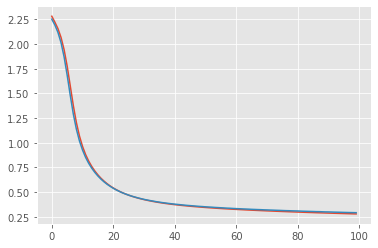

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import argparse

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
#                 help="path to the output loss/accuracy plot")

# args = vars(ap.parse_args())

# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_openml('mnist_784')

# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data,dataset.target, test_size=0.25)
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
# plt.savefig(args["output"])
plt.show()